## Section 10  Special Clustering and Embedding




## 1

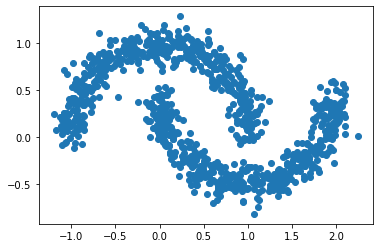

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

noisy_moons = datasets.make_moons(n_samples=1000, noise=0.10, random_state=553)
data = noisy_moons[0]
labels = noisy_moons[1]
plt.scatter(data[:,0], data[:,1])
plt.show()

## 1.1

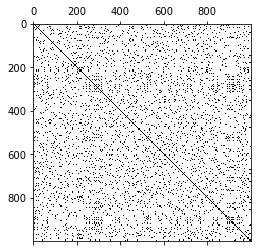

In [2]:
import numpy as np

data1 = data[np.newaxis, :, :]
data2 = data[:, np.newaxis, :]
temp = data1 - data2
distances = np.sum(temp*temp, axis=2)

W1 = (distances <= .1)
W = W1 * (1 - distances/.1)
np.fill_diagonal(W,0)
dd = W.sum(axis=0)

D = np.diag(dd)
L = D - W

plt.spy(L)
plt.show()

## 1.2

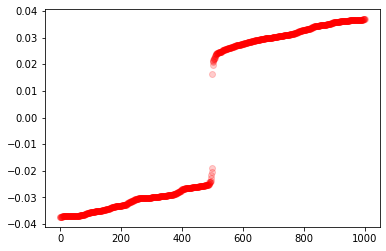

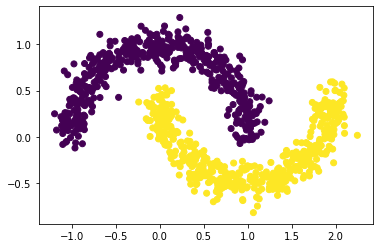

In [3]:
S, E = np.linalg.eigh(L)
idx = np.argsort(E[:,1])
plt.plot(E[idx, 1], 'or', alpha=0.2)
plt.show()

threshold = 0
clusters = E[:,1]<threshold

plt.scatter(data[:,0], data[:, 1], c = clusters)
plt.show()

## 2

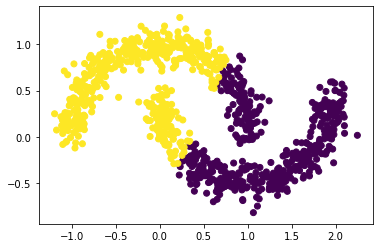

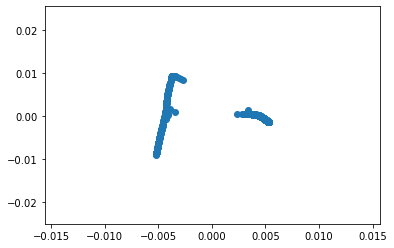

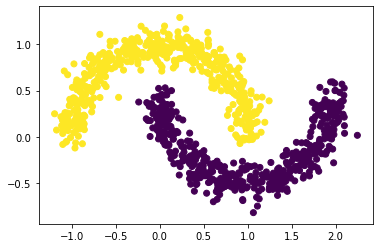

In [4]:
from sklearn.manifold import spectral_embedding as SE
from sklearn.cluster import KMeans

###model KMeans 
KM_model2=KMeans(n_clusters=2,random_state=636)
KM_model2.fit(data)
KM_label2=KM_model2.labels_
plt.scatter(data[:,0],data[:,1],c=KM_label2)
plt.show()

###model spectral embedding
SE_model=SE(W,n_components=2,random_state=636)
plt.scatter(SE_model[:,0],SE_model[:,1])
plt.show()
KM_model=KMeans(n_clusters=2,random_state=636)
KM_model.fit(SE_model)
KM_label=KM_model.labels_
plt.scatter(data[:,0],data[:,1],c=KM_label)
plt.show()

###drawbacks of K-means
###choice of K/ Outliers sensitivity/ Works very poorly on non-convex clusters/ Assumes spherical, equally likely clusters/